<a href="https://colab.research.google.com/github/axefx/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Axel_Corro_LS_DS13_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

source: https://www.kaggle.com/arindam235/startup-investments-crunchbase

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [34]:
!pip install category_encoders==2.*

     |████████████████████████████████| 102kB 3.6MB/s 


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/axefx/sample_datasets/master/investments_VC.csv', encoding= 'unicode_escape')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
train, test = train_test_split(df, random_state=24)
train, val = train_test_split(train, random_state=24)

In [19]:
train.shape, val.shape, test.shape

((30540, 39), (10180, 39), (13574, 39))

In [40]:
# Choose your target. Which column in your tabular dataset will you predict?
import category_encoders as ce

target = 'status'
y_train = train[target]

encoder = ce.OrdinalEncoder()
y_train_encoded = encoder.fit_transform(y_train)

,status
39306,1
27795,1
33766,2
33716,2
17753,2


In [46]:
y_train.value_counts(dropna=False)

operating    23405
NaN           3548
acquired      2097
closed        1490
Name: status, dtype: int64

In [21]:
# Is your problem regression or classification? classification
y_train.value_counts(normalize=True)

operating    0.867109
acquired     0.077690
closed       0.055202
Name: status, dtype: float64

In [43]:
y_train_encoded[target].value_counts(normalize=True)

2    0.766372
3    0.116176
1    0.068664
4    0.048788
Name: status, dtype: float64

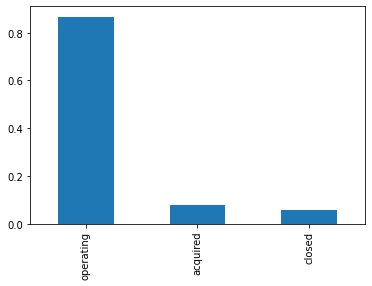

In [44]:
# How is your target distributed?
# Classification: How many classes? Are the classes imbalanced?
y_train.value_counts(normalize=True).plot.bar();

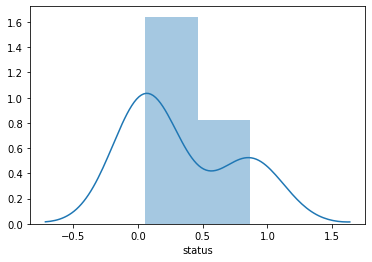

In [23]:
import seaborn as sns
sns.distplot(y_train.value_counts(normalize=True))

In [53]:
# Choose your evaluation metric(s).
# accuracy 
from sklearn.metrics import accuracy_score

majority_class = y_train_encoded[target].mode()[0]
y_pred = [majority_class] * len(y_train_encoded)
accuracy_score(y_train_encoded[target],y_pred)

0.7663719711853307

In [54]:
# Choose which observations you will use to train, validate, and test your model.

# unusable columns
unusable = ['permalink','name','homepage_url']
train.drop(columns=unusable)

train_features = train.drop(columns=[target])

numeric_features = train_features.select_dtypes(include='number').columns.tolist()

cardinality = train_features.select_dtypes(exclude='number').nunique()

categorical_features = cardinality[cardinality <= 50].index.tolist()

features = numeric_features + categorical_features
print(features)

['funding_rounds', 'founded_year', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [56]:
df.iloc[:, [4]].columns#.value_counts()

Index(['market'], dtype='object')

In [0]:
df.columns = df.columns.str.strip()

# TODO
# encode category_list

In [13]:
df['market'].value_counts()

 Software                    4620
 Biotechnology               3688
 Mobile                      1983
 E-Commerce                  1805
 Curated Web                 1655
                             ... 
 Natural Gas Uses               1
 Social Opinion Platform        1
 Musical Instruments            1
 Governance                     1
 EDA Tools                      1
Name: market, Length: 753, dtype: int64